Iris Dataset  :  3 classes of flowers

In [101]:
import torch
import torch.nn as nn  # torch has a neural network library torch.nn, we will use that as "nn"
import torch.nn.functional as F  # torch.nn.functional provides functions for operations commonly used in neural networks, such as activation functions and loss functions


Certainly! In PyTorch, `torch`, `torch.nn`, and `torch.nn.functional` are three key libraries used for creating and working with neural networks. Let's break down the purpose of each:

1. **`torch` Module:**
   - The `torch` module is the core PyTorch library that provides support for multidimensional tensors and mathematical operations on them.
   - It includes functions for creating tensors, performing basic operations (addition, multiplication, etc.), and low-level operations needed for numerical computations.
   - Example: `torch.tensor()`, `torch.add()`, `torch.matmul()`, etc.

2. **`torch.nn` Module:**
   - The `torch.nn` module, often referred to as `nn`, is PyTorch's neural network library. It provides high-level abstractions for building and training neural networks.
   - It includes classes and modules for defining neural network layers, loss functions, and optimization algorithms.
   - Example: `nn.Module` is a base class for all neural network modules, and you can define your custom neural network by subclassing it. It also includes pre-defined layers like `nn.Linear` for fully connected layers, `nn.Conv2d` for convolutional layers, and more.
   - `nn` is crucial for building complex neural network architectures and encapsulating the training process.

3. **`torch.nn.functional` Module:**
   - The `torch.nn.functional` module, often imported as `F`, contains a variety of functions that operate on tensors and are commonly used in neural network implementations.
   - It includes activation functions (e.g., `F.relu()` for rectified linear unit), loss functions (e.g., `F.cross_entropy()` for cross-entropy loss), and other utility functions.
   - While `nn` is more focused on building network architectures, `F` is often used for element-wise operations and functions that don't have any parameters to be learned.
   - Example: `F.relu()`, `F.cross_entropy()`, etc.

Now, let's complete the third comment:

```python
import torch
import torch.nn as nn  # torch has a neural network library torch.nn, we will use that as "nn"
import torch.nn.functional as F  # torch.nn.functional provides functions for operations commonly used in neural networks, such as activation functions and loss functions
```

In summary, these libraries work together to provide a comprehensive framework for building and training neural networks in PyTorch. `torch` forms the foundation with tensor operations, `torch.nn` provides high-level abstractions for building networks, and `torch.nn.functional` complements this by offering various functions used in neural network operations.

In [102]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower - length and width of sepals and petals) ---> hidden layer 1(number of fetures) --> H2(n) --> Output layer(3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3): # constructor
     super().__init__() # just to instantiate our nn.Module
     self.fc1 = nn.Linear(in_features, h1) # fc = fully connected,
     self.fc2 = nn.Linear(h1, h2)
     self.out = nn.Linear(h2, out_features)

  def forward(self,x): # doing stuff(relu activation) and moving forward, one layer to another
    x = F.relu(self.fc1(x)) # rectified linear unit : <0 = 0, >0, x=x
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

Certainly! The provided code defines a simple neural network model using PyTorch's `nn.Module` and `nn.Linear` layers. Let's break down the code and understand each part:

```python
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # Constructor - Defines the architecture of the neural network
        super(Model, self).__init__()  # Call the constructor of the parent class (nn.Module)
        
        # Define the layers of the neural network
        self.fc1 = nn.Linear(in_features, h1)  # Fully connected layer 1, iske phle layer me `in_features` nodes and iss layer me h1 nodes.
        self.fc2 = nn.Linear(h1, h2)           # Fully connected layer 2, iske pahle vali layer me h1 nodes, and iss layer me h2 nodes
        self.out = nn.Linear(h2, out_features)  # Output layer, iske just pahle vali layer me h2 nodes, and is layer me out_features ke barabr nodes

    def forward(self, x):
        # Forward pass - Defines how input data is processed through the layers

        # Apply the first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))

        # Apply the second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))

        # Apply the output layer (no activation function applied)
        x = self.out(x)

        return x
```

Now, let's go through each part of the code:

1. **Class Definition:**
   - `class Model(nn.Module):`: This line defines a new class named `Model` that inherits from `nn.Module`. This means that our `Model` class is a neural network module and can benefit from PyTorch's neural network functionalities.

2. **Constructor (`__init__` method):**
   - `def __init__(self, in_features=4, h1=8, h2=9, out_features=1):`: This is the constructor method that initializes the neural network's architecture. It takes parameters for the number of input features (`in_features`), the sizes of hidden layers 1 and 2 (`h1` and `h2`), and the number of output features/classes (`out_features`).

   - `super(Model, self).__init__()`: Calls the constructor of the parent class (`nn.Module`). It is necessary to include this line in the constructor of any class that inherits from `nn.Module`.

   - `self.fc1 = nn.Linear(in_features, h1)`: Defines the first fully connected (linear) layer with `in_features` input neurons and `h1` output neurons.

   - `self.fc2 = nn.Linear(h1, h2)`: Defines the second fully connected layer with `h1` input neurons and `h2` output neurons.

   - `self.out = nn.Linear(h2, out_features)`: Defines the output layer with `h2` input neurons and `out_features` output neurons.

3. **Forward Method (`forward` method):**
   - `def forward(self, x):`: This method defines the forward pass of the neural network. It specifies how input data `x` moves through the layers defined in the constructor.

   - `x = F.relu(self.fc1(x))`: Applies the first fully connected layer (`fc1`) followed by a Rectified Linear Unit (ReLU) activation function.

   - `x = F.relu(self.fc2(x))`: Applies the second fully connected layer (`fc2`) followed by a ReLU activation.

   - `x = self.out(x)`: Applies the output layer (`out`) without an activation function. This is typical for regression tasks; for classification tasks, you might use a softmax activation here.

   - `return x`: Returns the final output of the neural network.

In summary, this code defines a simple feedforward neural network with one hidden layer. The network takes an input with 4 features, processes it through two hidden layers with ReLU activations, and produces an output. The specific architecture can be adjusted by changing the parameters in the constructor.

Features and neurons are the same

Yes, you are correct. I appreciate your attention to detail. Let me clarify the terminology:

In the context of the `nn.Linear` layers:

- For `self.fc1 = nn.Linear(in_features, h1)`, `in_features` refers to the number of input features (or input neurons), and `h1` refers to the number of output features (or output neurons) from the first fully connected layer.

- For `self.fc2 = nn.Linear(h1, h2)`, `h1` from the previous layer becomes the number of input features (or input neurons) for the second fully connected layer, and `h2` represents the number of output features (or output neurons) from the second fully connected layer.

- For `self.out = nn.Linear(h2, out_features)`, `h2` from the previous layer becomes the number of input features (or input neurons) for the output layer, and `out_features` represents the number of output features (or output neurons) from the output layer.

In the terminology of neural networks, the terms "neurons" and "features" are often used interchangeably when referring to the number of computational units in a layer. In the context of the code:

- `in_features`, `h1`, and `h2` are the numbers of neurons (or features) for their respective layers.
- `out_features` refers to the number of output features (or neurons) from the output layer.

So, when I mentioned "input neurons" and "output neurons" in the previous explanation, I meant the number of features (or neurons) in the respective layers of the neural network. I appreciate your careful observation, and I hope this clarifies any confusion.

**Neurons and Nodes are same = Spherical diagram = Computational units, These units receive input, perform a computation, and produce an output.**

In the context of neural networks, the terms "neurons" and "nodes" are often used interchangeably. Both refer to the computational units within a neural network. **These units receive input, perform a computation, and produce an output.**

The terminology can vary, and sometimes the word "neuron" is used to describe these units, emphasizing the biological inspiration from the structure of neurons in the brain. On the other hand, the term "node" is often used more generically to describe a point of connection within a network, and it is commonly used in the context of graph theory.

In summary:
- "Neuron" is a term often used to describe the basic computational unit in a neural network, emphasizing the biological analogy.
- "Node" is a more general term that can be used to describe any point of connection in a network, including the computational units in a neural network.

In practical discussions about neural networks, you'll encounter both terms, and they generally refer to the same concept. The choice of terminology may depend on the author's preference or the context in which it is used.

SO EK DOUBT CLEAR HUA KI

self.fc1 = nn.Linear(in_features, h1) means

Fully connected layer 1, ke pahle vali layer me `in_features` ke barabar neurons/nodes thin, jise fc1 ke liye input bolenge.

Fully_connected layer 1 me `h1` ke barabar nodes hain, jise layer fc1 ke liye output or fc2 ke liye input bolenge



`fc2 = nn.Linear( fc2 ke just phle vali layer me no. of nodes , fc2 layer me no. of nodes)`

In [103]:
# manual seed : pick a manual seed for randomization
torch.manual_seed(41)

# create an instance of the model
model = Model()

**Loading data and Training the model**

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# loading data from url
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [106]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


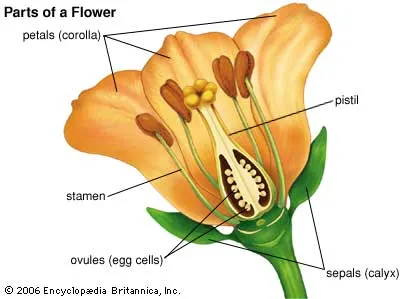

In [107]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [108]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [109]:
# changing last column from string to integer
df['species']=df['species'].replace('setosa',0.0)
df['species']=df['species'].replace('versicolor',1.0)
df['species']=df['species'].replace('virginica',2.0)

In [110]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [111]:
df['species'].mean() # us column ka mean de dega

1.0

In [112]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0.0,5.006,3.418,1.464,0.244
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [113]:
# features, labels separation
X = df.drop('species',axis=1)
Y = df['species']

In [114]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [116]:
# dataframe to numpy array
X = X.values
Y = Y.values

In [117]:

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [118]:
type(X)

numpy.ndarray

In [119]:
type(Y)

numpy.ndarray

In [120]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [121]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y, random_state=41)

In [122]:
# convert X 'features' to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [123]:
type(x_train)

torch.Tensor

In [124]:
x_train.dtype

torch.float32

In [125]:
# convert Y 'labels' to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [126]:
type(y_train)

torch.Tensor

In [127]:
y_train.dtype  # now 0, 1, 2 only; .0 hta diya last se

torch.int64

In [128]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) # the lower learning rate, the more training time

In [129]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [130]:
# training the model
# epochs ?? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(x_train) # get predicted results

  # measure the loss or error , gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs y_train values(actual values)

  # keep track of our losses : it will be tensor initially
  losses.append(loss.detach().numpy())

  # print loss at every 10 epochs
  if i % 10 == 0 :
    print(f'epoch: {i} and loss: {loss}')

  # Do some back propagation: take error rate of forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad() # Clear previous gradients
  loss.backward() # Backward pass to compute gradients
  optimizer.step() # Update weights using gradients


epoch: 0 and loss: 1.1225907802581787
epoch: 10 and loss: 1.010262131690979
epoch: 20 and loss: 0.8145238161087036
epoch: 30 and loss: 0.5885900855064392
epoch: 40 and loss: 0.40506789088249207
epoch: 50 and loss: 0.27837133407592773
epoch: 60 and loss: 0.19206830859184265
epoch: 70 and loss: 0.1352541148662567
epoch: 80 and loss: 0.09956573694944382
epoch: 90 and loss: 0.07878769934177399


Certainly! Let's go through the full code and explain each part:

```python
# training the model
# epochs ?? (one run thru all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(x_train)  # get predicted results

    # measure the loss or error, gonna be high at first
    loss = criterion(y_pred, y_train)  # predicted values vs y_train values (actual values)

    # keep track of our losses: it will be tensor initially
    losses.append(loss.detach().numpy())

    # print loss at every 10 epochs
    if i % 10 == 0:
        print(f'epoch: {i} and loss: {loss}')

    # Do some backpropagation: take error rate of forward propagation and feed it back thru the network to fine-tune the weights
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Backward pass to compute gradients
    optimizer.step()       # Update weights using gradients
```

1. **`epochs = 100`:**
   - This is the number of times the entire training dataset will be passed forward and backward through the neural network. Each pass is referred to as an epoch.

2. **`losses = []`:**
   - An empty list to store the training losses for each epoch.

3. **`for i in range(epochs):`:**
   - The beginning of a loop that iterates over the specified number of epochs.

4. **`y_pred = model.forward(x_train)`:**
   - Forward pass: Computes the predicted output (`y_pred`) of the model given the input data (`x_train`).

5. **`loss = criterion(y_pred, y_train)`:**
   - Computes the loss or error between the predicted output (`y_pred`) and the actual target values (`y_train`). The `criterion` is typically a loss function such as mean squared error, cross-entropy, etc.

6. **`losses.append(loss.detach().numpy())`:**
   - Appends the current loss value (converted to a NumPy array) to the list of losses.

7. **`if i % 10 == 0: print(f'epoch: {i} and loss: {loss}')`:**
   - Prints the current epoch and the associated loss every 10 epochs. This is for monitoring the training progress.

8. **Backpropagation:**
   - **`optimizer.zero_grad()`:** Clears the gradients of all optimized tensors. It's necessary to zero the gradients before the backward pass to avoid accumulation.

   - **`loss.backward()`:** Backward pass: Computes the gradients of the model parameters with respect to the loss.

   - **`optimizer.step()`:** Performs a single optimization step. Updates the model parameters based on the computed gradients and the optimization algorithm (e.g., stochastic gradient descent).

The loop repeats for the specified number of epochs, and with each iteration, the model is trained to minimize the loss on the training data. The training losses are stored in the `losses` list for later analysis.

`loss.detach().numpy():`

**loss.detach():** Detaches the tensor from the computation graph. This is commonly done to prevent gradients from being calculated for this specific tensor. The detach method returns a new tensor that is detached from the computation graph.

**.numpy():** Converts the detached tensor to a NumPy array. This is useful when you want to extract the numerical value from a PyTorch tensor, especially if you're working with scalar values like the loss

Text(0.5, 0, 'Epoch')

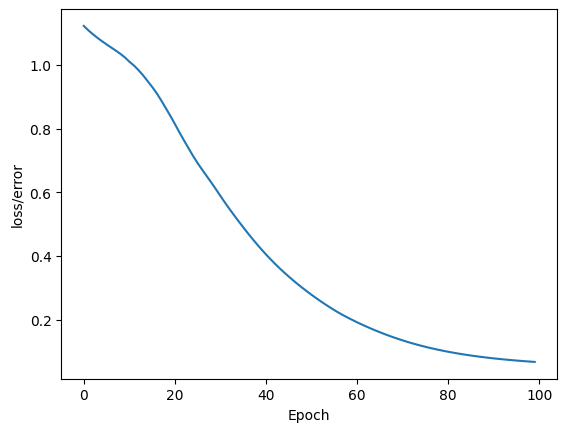

In [131]:
# graph is out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

Evaluating the model on test data

In [132]:
with torch.no_grad(): # basically turn off back propagation
   y_evel = model.forward(x_test) # X_test are features from our test set, y_eval will be predictions
   loss = criterion(y_evel, y_test) # find the loss or error

In [133]:
loss

tensor(0.0775)

In [137]:
# To know how many predictions we got correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test): # index, value sath sath chalana ho toh enumerate use hota hai
    y_val = model.forward(data) # prediction of probabilities of all the three classes : a tensor list of 3 probability values for each of the datapoints in y_test

    # Map numeric labels to flower names for easier interpretation : btw no need for now
    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    # output ko dhyan se dekho samjh jaoge. y_test[i] is the actual class label of the data

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.  tensor([-2.7688,  4.5951,  0.8331]) 	 1 	 1
2.  tensor([-4.2160,  5.9740,  1.6257]) 	 1 	 1
3.  tensor([-3.4885,  5.2600,  1.2117]) 	 1 	 1
4.  tensor([ 4.5491, -2.1920, -2.9333]) 	 0 	 0
5.  tensor([ 4.0381, -1.7141, -2.6900]) 	 0 	 0
6.  tensor([-6.2060,  4.3045,  6.9393]) 	 2 	 2
7.  tensor([-7.8602,  4.1402,  9.8887]) 	 2 	 2
8.  tensor([-5.4665,  4.8800,  5.0120]) 	 1 	 2
9.  tensor([-3.7134,  5.0030,  1.9093]) 	 1 	 1
10.  tensor([-3.8544,  5.6281,  1.4040]) 	 1 	 1
11.  tensor([-4.2792,  5.9942,  1.7309]) 	 1 	 1
12.  tensor([-2.6830,  4.4988,  0.7878]) 	 1 	 1
13.  tensor([-6.6188,  4.0617,  7.8865]) 	 2 	 2
14.  tensor([-6.4898,  4.0048,  7.7299]) 	 2 	 2
15.  tensor([-8.7733,  3.5977, 12.0530]) 	 2 	 2
16.  tensor([-7.1210,  5.1783,  7.4716]) 	 2 	 2
17.  tensor([ 4.1068, -1.7822, -2.7170]) 	 0 	 0
18.  tensor([-3.5145,  5.3066,  1.2238]) 	 1 	 1
19.  tensor([ 4.8191, -2.4277, -3.0794]) 	 0 	 0
20.  tensor([-5.5271,  5.0512,  4.9244]) 	 2 	 1
21.  tensor([ 3.5511, -1.2628

In [138]:
accuracy = correct/len(y_test)

In [146]:
y_test.dtype

torch.int64

good to see ki, len function list, numpy array and tensor teeno me kam krta hai.

In [139]:
accuracy

0.9333333333333333

Demonstrating tensor.argmax().items()

In [142]:
# y_val = torch.tensor([0.2, 0.8, 0.1]) se max value ka index prapt krna
my_tensor = torch.tensor([0.2, 0.8, 0, 1]) # index 3 is max
print(my_tensor.argmax())  # this will be max index but in tensor object
print(my_tensor.argmax().item()) # is max index ko scaler me prapt krna

tensor(3)
3


In [143]:
type(my_tensor.argmax().item())

int

In [144]:
type(my_tensor.argmax())

torch.Tensor

# Making a prediction

In [147]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [148]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.6057, -2.2489, -2.9639])


In [149]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [151]:
with torch.no_grad():
  label = model(newer_iris).argmax().item()
  if label == 0:
      print("Setosa")
  elif label == 1:
      print('Versicolor')
  else:
      print( 'Virginica')

Virginica


In [152]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [153]:
# Load the Saved Model : means the weights and biases that have been saved
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [154]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)